# **Subjective Answer Evaluator**

## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/Sub_Ans_Evaluator

/content/drive/.shortcut-targets-by-id/17Gn89Edqfyxljr8tO09VdcQWGcUCa_Ua/descriptive_evaluation_project/Sub_Ans_Evaluator


In [24]:
!ls

answer.txt			       LICENSE
B1.txt				       loading_functions.py
B2.txt				       __pycache__
evaluate.py			       README.md
GoogleNews-vectors-negative300.bin.gz  Run_Evaluator.ipynb
helping_functions.py		       W1.txt
keysen.txt			       W2.txt
keywords.txt


## Import Dataset

In [ ]:
DATASET_CSV = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/Dataset/Define OOPs.csv'
# DATASET_CSV = 'Define OOPs.csv'

In [ ]:
import pandas as pd

oop_dataset=pd.read_csv(DATASET_CSV, encoding="ISO-8859-1")
oop_dataset.head()
oop_dataset=oop_dataset[:1000]
# oop_dataset["is_duplicate"].tail(50)
# oop_dataset["is_duplicate"].head(50)

In [25]:
df = pd.DataFrame(oop_dataset, columns = ['Question No.', 'Question', 'USN', 'Answer Key', 'Student Answer','Marks'])
print(df)

   Question No.                                  Question         USN  \
0         1. a)  Define Object Oriented Programming (OOP)  1MS17CS065   
1         1. a)  Define Object Oriented Programming (OOP)  1MS18CS073   
2         1. a)  Define Object Oriented Programming (OOP)  1MS18CS112   
3         1. a)  Define Object Oriented Programming (OOP)  1MS19CS001   
4         1. a)  Define Object Oriented Programming (OOP)  1MS19CS002   
..          ...                                       ...         ...   
94        1. a)  Define Object Oriented Programming (OOP)  1MS19CS143   
95        1. a)  Define Object Oriented Programming (OOP)  1MS19CS144   
96        1. a)  Define Object Oriented Programming (OOP)  1MS19CS145   
97        1. a)  Define Object Oriented Programming (OOP)  1MS19CS146   
98        1. a)  Define Object Oriented Programming (OOP)  1MS19CS147   

                                           Answer Key  \
0   Object-oriented programming (OOP) is a compute...   
1   Objec

## Extract Keywords using RAKE and add to keywords.txt

In [ ]:
from gensim.summarization import keywords
gAnsKeys = []
keys = keywords(df["Answer Key"][0])
gAnsKeys = keys.split('\n')
gAnsKeys

['programming']

In [27]:
!pip install rake_nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from rake_nltk import Rake
rake_nltk_var = Rake()
# text1 = []
rake_nltk_var.extract_keywords_from_text(df["Answer Key"][0])
keyword_extracted = rake_nltk_var.get_ranked_phrases()
keyword_extracted

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['organizes software design around data',
 'computer programming model',
 'oriented programming',
 'rather',
 'oop',
 'objects',
 'object',
 'logic',
 'functions',
 'follows',
 'bottom',
 'approach']

In [31]:
keywords_for_txt=""
for key in keyword_extracted:
  keywords_for_txt = keywords_for_txt+key+","
keywords_for_txt = keywords_for_txt+'0'

keyFile = open("keywords.txt", "w")
keyFile.write(keywords_for_txt)
keyFile.close()

## Extract Keyphrases and add to keysen.txt

In [ ]:
# Libraries for text preprocessing
import re
import nltk
import pandas
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)
df['Answer Key'][0]
print(type(df['Answer Key'][0]))

<class 'str'>


In [ ]:
import string
import re
corpus = []

# Remove punctuations
text = df['Answer Key'].str.replace(r'[^a-zA-Z]', ' ')
# for i in range(0, 123):

# Convert to lowercase
text = [word.lower() for word in text] 

# remove tags
text = df['Answer Key'].str.replace(r"&lt;/?.*?&gt;"," &lt;&gt; ")
    
# remove special characters and digits
text = df['Answer Key'].str.replace(r"(\\d|\\W)+"," ")
    
##Convert to list from string
text = [word.split() for word in text]
    
##Stemming
ps=PorterStemmer()

#Lemmatisation 
lem = WordNetLemmatizer()
text1=[]
for word in text:
  text1.append([lem.lemmatize(w) for w in word if not w in stop_words])
text = [" ".join(t) for t in text1]
corpus=text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=100,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

                       Tri-gram  Freq
0   object oriented programming    99
1      oriented programming oop    99
2      programming oop computer    99
3      oop computer programming    99
4    computer programming model    99
5   programming model organizes    99
6      model organizes software    99
7     organizes software design    99
8        software design around    99
9            design around data    99
10          around data objects    99
11          data objects rather    99
12      objects rather function    99
13        rather function logic    99
14            function logic it    99
15             logic it follows    99
16            it follows bottom    99
17            follows bottom up    99
18           bottom up approach    99


[Text(0, 0, 'object oriented programming'),
 Text(0, 0, 'oriented programming oop'),
 Text(0, 0, 'programming oop computer'),
 Text(0, 0, 'oop computer programming'),
 Text(0, 0, 'computer programming model'),
 Text(0, 0, 'programming model organizes'),
 Text(0, 0, 'model organizes software'),
 Text(0, 0, 'organizes software design'),
 Text(0, 0, 'software design around'),
 Text(0, 0, 'design around data'),
 Text(0, 0, 'around data objects'),
 Text(0, 0, 'data objects rather'),
 Text(0, 0, 'objects rather function'),
 Text(0, 0, 'rather function logic'),
 Text(0, 0, 'function logic it'),
 Text(0, 0, 'logic it follows'),
 Text(0, 0, 'it follows bottom'),
 Text(0, 0, 'follows bottom up'),
 Text(0, 0, 'bottom up approach')]

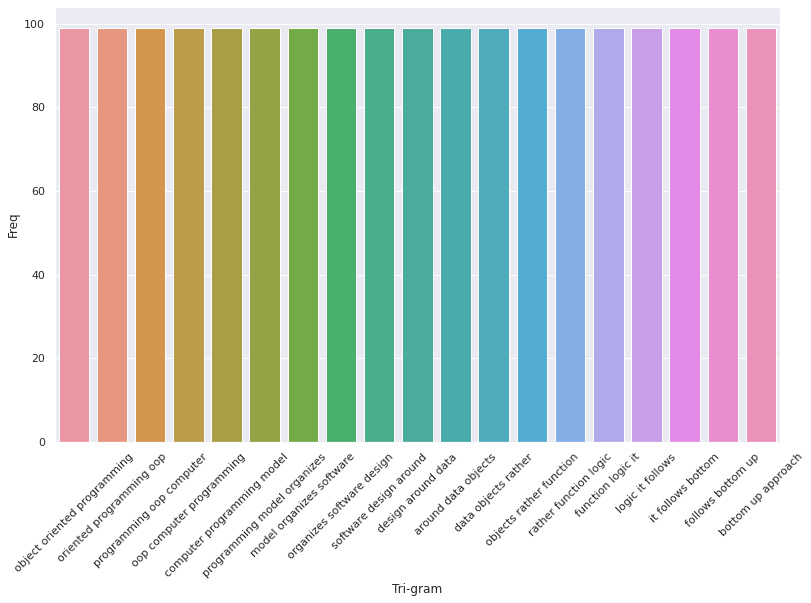

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[32]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\Answer:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

\Answer:
Object-oriented programming (OOP) computer programming model organizes software design around data, objects, rather function logic. It follows bottom-up approach.

Keywords:
programming 0.267
software design around 0.134
software design 0.134
software 0.134
rather function logic 0.134


In [ ]:
senFile = open("keysen.txt", "w")
for k in keywords:
  senFile.write(k+'\n')
senFile.close()

## Evaluate every answer in the CSV file

In [32]:
!python3 evaluate.py

Time to load model 19.494146823883057
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/content/drive/.shortcut-targets-by-id/17Gn89Edqfyxljr8tO09VdcQWGcUCa_Ua/descriptive_evaluation_project/Sub_Ans_Evaluator/loading_functions.py:121: RuntimeWarning: invalid value encountered in true_divide
  ans_sent_vec.append(temp_v/(len(temp_s)-bogus))
Time for doing calculations: 1.6893208026885986
Raw matching:----------------- 0.37908476260281054
Percentage matching:----------------- 0.4
Graded Vector: [[0.25      ]
 [3.10668979]
 [0.26666667]]
________________________________________________